# SYSC4415 Introduction to Machine Learning Answer Key
## Assignment 1
|**Student name** | **Student number**|
|-----------------|-------------------|
| Zhuoxin Ma      | 101093563

# Question 1
 > i) Calculate the gradient of the following function: 
$$ f(x,y,z) \stackrel{\text{def}}{=} z^3 + x^2y-y^2 + 3yz $$

>  ii) What is the gradient at (-2,3,1) 

>  iii)What does this vector represent?

i) $$∇f(x,y,z)=(\frac{\partial f }{\partial x},\frac{\partial f}{\partial y},\frac{\partial f}{\partial z})=(2xy,x^{2}-2y+3z, 3z^{2}+3y)$$

ii)    let x=-2, y=3, z=1
$$∇f(x,y,z)=(2\cdot (-2)\cdot 3 , (-2)^{2}-2\cdot (3)+3\cdot 1 , 3\cdot 1^{2}+3\cdot 3)=(-12,1,12)$$

iii) This vector represents the rate of change of function f at the point (-2,3,1).
    
    

# Question 2
*(see text of question in assignment instructions)*

>a.   What is the expected value from this sample? Using an unbiased estimator, what is the sample variance and standard deviation?

>b.   What is $Pr(3)$?

>c.   Find the expected value and the variance for $Pr(x)$.

>d.   Find the probability that a student slept 2 hours the night before ($x=2$), given that they did not need excess amounts of coffee. That is, find $Pr(2|-)$. Hint: $Pr(+)$ can be found by summing over $Pr(+|x)Pr(x)$, for all $x$. $Pr(-|x)$ can be derived from $Pr(+|x)$.

a). Excepted value from this sample: 
$$ E(x) = \sum_{n=1}^{5} Pr(x_i) * x_i $$

$$ E(x) = ({\frac{3}{10}\cdot 1}) + ({\frac{3}{10}\cdot 2}) + ({\frac{2}{10}\cdot 3})+ ({\frac{1}{10}\cdot 4}+ ({\frac{1}{10}\cdot 5})) $$

$$=0.3+0.6+0.6+0.4+0.5=2.4$$

   Variance for this sample:
$$ \sigma^2=\frac{\sum_{n=1}^{10} (x-\mu)^2}{n-1} $$

$$ =\frac{3\cdot (1-2.4)^{2}+3\cdot (2-2.4)^{2}+2\cdot (3-2.4)^{2}+1\cdot (4-2.4)^{2}+1\cdot (5-2.4)^{2}}{10-1} $$

$$=1.8\bar{2}$$

   Standard Deviation for this sample:
$$ \sigma= \sqrt{1.8\bar{2}} = 1.35$$

b).
$$ \sum_{n=1}^{\infty} (Pr) = 1 $$

$$ Pr(3) = 1 - 0.25 - 0.3 - 0.1 - 0.15=0.2 $$

c).
Excepted value: 
$$ E(x) = \sum_{n=1}^{5} Pr(x_i) * x_i $$

$$ E(x) = ({0.25\cdot 1}) + ({0.3\cdot 2}) + ({0.2\cdot 3})+ ({0.1\cdot 4})+ ({0.15\cdot 5})) $$

$$=0.25+0.6+0.6+0.4+0.75=2.6$$

Variance:
$$ \sigma^2= E[(x-\mu)^2]  $$

$$ ={0.25\cdot (1-2.6)^2} + {0.3\cdot (2-2.6)^2} + {0.2\cdot (3-2.6)^2} + {0.1\cdot (4-2.6)^2} + {0.15\cdot (5-2.6)^2}  $$

$$=0.25\cdot (-1.6)^2+0.3\cdot (-0.6)^2+0.2\cdot (0.4)^2+0.1\cdot (1.4)^2+0.15\cdot (2.4)^2=1.84$$

d).
$$Pr(-|2)=1-Pr(+|2)=1-0.55=0.45$$

$$Pr(2)=0.3$$

$$Pr(-)=\sum {Pr(-|x)\cdot Pr(x)}\sum={(1-Pr(+|x))\cdot Pr(x)}$$

$$=(1-0.75)\cdot 0.25+(1-0.55)\cdot 0.3+(1-0.35)\cdot 0.2+(1-0.2)\cdot 0.1+(1-0.1)\cdot 0.15$$

$$=0.25\cdot 0.25+0.45\cdot 0.3+0.65\cdot 0.2+0.8\cdot 0.1+0.9\cdot 0.15=0.5425$$

$$Pr(2|-)=\frac{Pr(-|2)\cdot Pr(2)}{Pr(-)}$$

$$=\frac{0.45\cdot 0.3}{0.5425}=0.2488$$


# Question 3

Create a python notebook which loads the Kaggle Diabetes dataset (https://www.kaggle.com/mathchi/diabetes-data-set). This dataset has 8 features and 2 classes of diabetes possibility: Outcome: 0= doesnt't have diabetes; 1= has diabetes. *Hint: look at the notebooks from Tutorials 2 & 3 for example code for achieving the steps below.* 

>  a) Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling. 

>  b) Train and test a logistic regression classifier. How accurate is your classifier?

>  c) Repeat part b), only the Pregnancies and SkinThickness features from the dataset. Was the classifier accuracy impacted?
  
>  d) Using the (two feature) classifier from part c), create two subplots using the Preganancies and SkinThickness features from the dataset.

>> i)  On the first, plot the decision boundary and the training data. Use green for doesn't have diabetes (Outcome==0) and blue for Has diabetes (Outcome==1).

>> ii) On the second, plot the decision boundary and the test data. Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.




In [2]:
# Load libraries...
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Q3.a) Create the dataset

The first step is loading the Kaggle Diabetes data. We will then split off the test data to be used for all training sets. Then create each training set, using **stratified sampling**

In [3]:
# Load the Kaggle Diabetes dataset
kaggleData = pd.read_csv('diabetes.csv')
##test:kaggleData

x=pd.DataFrame(kaggleData,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y=pd.DataFrame(kaggleData,columns=['Outcome'])

# Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling.
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.25,stratify=y['Outcome'])

In [4]:
kaggleData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Q3.b) Train and test a logistic regression classifier. How accurate is your classifier?

In [5]:
#Train a logistic regression classifier
logitModel = sm.Logit(trainY,trainX)
result = logitModel.fit()
predY = result.predict(testX).round()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(testY, predY)))

Optimization terminated successfully.
         Current function value: 0.597648
         Iterations 5
Accuracy of logistic regression classifier on test set: 0.67


## Q3.c) Repeat part b), only the Pregnancies and SkinThickness features from the dataset. Was the classifier accuracy impacted?

In [6]:
x1=pd.DataFrame(kaggleData,columns=['Pregnancies','SkinThickness'])
y1=pd.DataFrame(kaggleData,columns=['Outcome'])
trainX1,testX1,trainY1,testY1=train_test_split(x1,y1,test_size=0.25,stratify=y1['Outcome'])
#Train a logistic regression classifier
logitModel = sm.Logit(trainY1,trainX1)
result1 = logitModel.fit()
predY1 = result1.predict(testX1).round()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(testY1, predY1)))

Optimization terminated successfully.
         Current function value: 0.675240
         Iterations 4
Accuracy of logistic regression classifier on test set: 0.61


In [7]:
diff=accuracy_score(testY, predY)-accuracy_score(testY1, predY1)
print("Yes, the accuracy of the classifier is impacted by using fewer features. The accuracy drops by "+str(diff)+" compared with Q3.b).")

Yes, the accuracy of the classifier is impacted by using fewer features. The accuracy drops by 0.05208333333333326 compared with Q3.b).


## Q3.d) Using the (two feature) classifier from part c), create two subplots using the Preganancies and SkinThickness features from the dataset.

C:\Users\13439\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'SkinThickness')

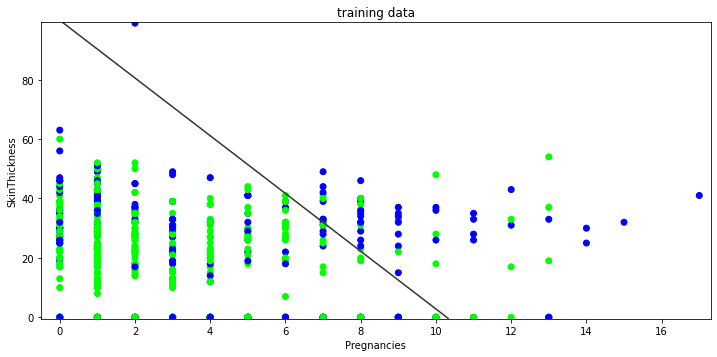

In [8]:
# On the first, plot the decision boundary and the training data. 
# Use green for doesn't have diabetes (Outcome==0) and blue for Has diabetes (Outcome==1).
trainX2=trainX1.to_numpy()
trainY2=trainY1.to_numpy()
testX2=testX1.to_numpy()
testY2=testY1.to_numpy()


h = 0.2
cm = plt.cm.GnBu
fig = plt.figure(figsize= (12,12))
cm_bright=ListedColormap(['#00FF00', '#0000FF'])

model = LogisticRegression().fit(trainX2, trainY2)

subplot = plt.subplot(2, 1, 1)
x_min, x_max = trainX2[:, 0].min() - 0.5, trainX2[:, 0].max() + 0.5
y_min, y_max = trainX2[:, 1].min() - 0.5, trainX2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
subplot.contour(xx, yy, prob,levels=[.5], cmap="Greys", vmin=0, vmax=.6)
subplot.scatter(trainX2[:,0], trainX2[:,1],c=trainY2,cmap=cm_bright)
subplot.set_title('training data')
subplot.set_xlabel('Pregnancies')
subplot.set_ylabel('SkinThickness')

Text(0, 0.5, 'SkinThickness')

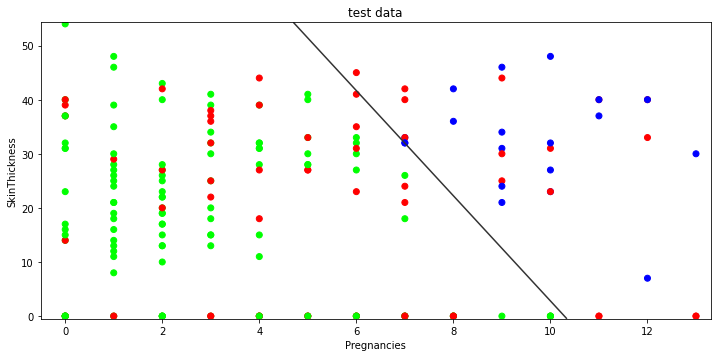

In [9]:
# On the second, plot the decision boundary and the test data. 
# Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.
h = 0.2
cm = plt.cm.GnBu
fig = plt.figure(figsize= (12,12))
cm_bright=ListedColormap(['#00FF00', '#0000FF', '#FF0000'])

subplot = plt.subplot(2, 1, 2)
x_min, x_max = testX2[:, 0].min() - 0.5, testX2[:, 0].max() + 0.5
y_min, y_max = testX2[:, 1].min() - 0.5, testX2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
predy = model.predict(testX2)
for i in range(len(testX2)):
        if predy[i] != testY2[i]:
            testY2[i] = 2
subplot.contour(xx, yy, prob,levels=[.5], cmap="Greys", vmin=0, vmax=.6)
subplot.scatter(testX2[:,0], testX2[:,1],c=testY2,cmap=cm_bright)
subplot.set_title('test data')
subplot.set_xlabel('Pregnancies')
subplot.set_ylabel('SkinThickness')

# Question 4

Linear regression. Download the file “Assig1Q4.csv” from GitHub under “Assignments/Assignment1”. The first column represents the X values, while the second column represents the Y values.

>  a) Plot the data

We are going to use linear regression to fit a linear and a cubic model to these data.

>  b) Without using sklearn.linear_model (or any other linear regression libraries), write your own python code to implement the least squares solution for linear regression. That is:
$$\beta=(X^TX)^{−1}X^Ty$$

>  c) Assuming the model $y=mx+b$, use your code to best-fit the parameters $m$ and $b$ to the data. Report your optimal parameter values. 
Hints: 
  * recall that you must create the ‘augmented’ feature vector $X$ from the given $x$ data (add a column of 1’s). 
  * look at numpy.T(), numpy.matmul(), numpy.dot(), and numpy.linalg.inv()


>  d) Plot your line of best fit on top of the data

>  e) Calculate the sum of square residuals, or mean squared error, as in:

$$MSE(\beta) = \sum_{i=1}^{N}{(y−X\beta)^2}$$
>  f) Assuming the model $y=ax^3+bx^2+cx+d$, repeat steps 2-4 using this new 
  model (i.e. estimate the optimal values for $a$,$b$,$c$,$d$; report those estimates; plot the line of best fit; report the MSE).

>  g) Briefly discuss which model would you prefer for these data?

>  h) Why is best-fitting the second (cubic) model still considered linear regression?



## Step 1: Load the CSV file

Text(0.5, 1.0, 'plotting the x values')

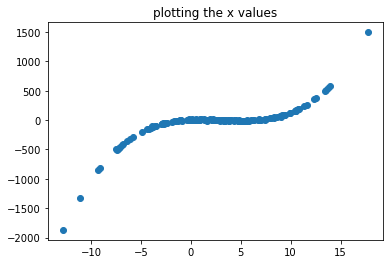

In [10]:
import pandas as pd
from numpy.linalg import inv
data = pd.read_csv("Assig1Q4.csv", header=None)

#plot the graph with only the data point
x_values = np.array(data[0])
y_values = np.array(data[1])

plt.scatter(x_values,y_values)
plt.title("plotting the x values")

## Step 2: Linear model $y=mx+b$

The least squares solution for linear regression is y=39.481x-125.21
MSE = 34193.06122162065


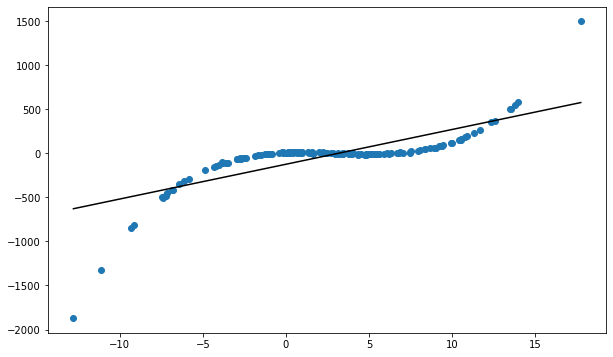

In [20]:
# Augment the x vector
augx=np.stack((np.ones(data[0].size),data[0]),axis=-1)

# Compute beta
beta=np.matmul(inv(np.matmul(augx.T,augx)),np.matmul(augx.T,data[1].to_numpy()))
b=beta[0]
m=beta[1]
print("The least squares solution for linear regression is y="+str(m.round(3))+"x"+str(b.round(3)))

# Compute the MSE
MSE=np.sum(np.square(data[1]-np.dot(augx,beta)))/len(data[0])
print("MSE =", MSE)

#generate the plot with linear regression line
fig = plt.figure(figsize=(10, 6))
plt.scatter(data[0], data[1])
model = [m*x+b for x in data[0].sort_values()]
plt.plot(data[0].sort_values(),model, c='black')

## Step 3: Cubic model $y=ax^3+bx^2+cx+d$

The solution for linear regression is y=0.5x^3-4.512x^2+7.125x+4.608
MSE = 25.466105941912087


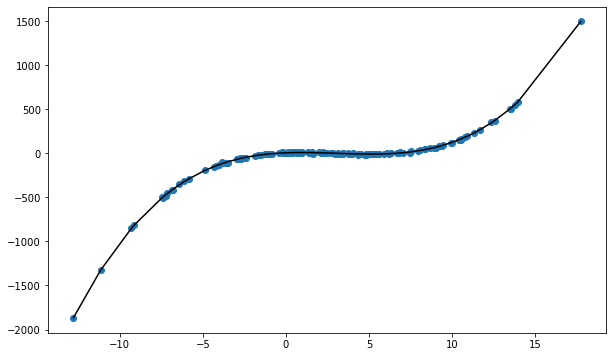

In [21]:
# Augment the x vector
augx1=np.stack((np.ones(data[0].size),data[0],data[0]**2,data[0]**3),axis=-1)
#augx1

# Compute beta
beta1=np.matmul(inv(np.matmul(augx1.T,augx1)),np.matmul(augx1.T,data[1].to_numpy()))
d=beta1[0]
c=beta1[1]
b=beta1[2]
a=beta1[3]
print("The solution for linear regression is y="+str(a.round(3))+"x^3"+str(b.round(3))+"x^2+"+str(c.round(3))+"x+"+str(d.round(3)))

# Compute the MSE
MSE_quad=np.sum(np.square(data[1]-np.dot(augx1,beta1)))/len(data[0])
print("MSE =", MSE_quad)

# generate the plot with linear regression line
fig = plt.figure(figsize=(10, 6))
plt.scatter(data[0], data[1])
model = [a*(x**3)+b*(x**2)+c*x+d for x in data[0].sort_values()]
plt.plot(data[0].sort_values(),model, c='black')

## Comment:

    g) The second model which is the cubic model is preferred. It has lower MSE which means it decribes(fits) the data better than the linear model that has a higher MSE.
    
    h) The cubic model is still considered linear regression because we are looking at the degree of parameters not the degree of the augmented x. The parameters in the model is a,b,c,d whose degree are all 1, so that the cubic model is still a linear regression model.

# Question 5

- Create a Jupyter Notebook based on `Tutorial-3_ComparingMultipleClassifiers.ipynb` to use `make_classification` to create a linearly separable dataset, with 2 classes, 2 informative features, 1500 samples per class, using a class_sep=1.7, and a random_state of 5. 
- Generate some random noise of the same shape as your feature data, drawn from a standard normal distribution (see `numpy.random`) and a random_state of 5. 
- Create four datasets: 
    1. no noise, 
    2. data + 0.5 * noise, 
    3. data + 1.0 * noise, 
    4. data + 2.0 * noise. 

> a) For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)

> b) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).

> c) For each dataset, train and test an SVM classifier with a polynomial kernel with `degree=2`, and `C=1.0`. Report the test score for each. How does prediction accuracy change with noise level?

> d) For a noise level of 0.5, train and test SVM classifiers using the following values for $C: \{0.001, 0.01, 0.1, 1, 10, 100\}$. 
   - Report the test accuracy for each. 
   - How does performance vary with $C$?
   - Briefly describe what the $C$ controls for sklearn.svc. *Hint: look at the documentation for `sklearn.svc` rather than the class notes here...*


In [13]:
# Load the required libraries...
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [14]:
# Create a Jupyter Notebook based on Tutorial-3_ComparingMultipleClassifiers.ipynb 
# use make_classification to create a linearly separable dataset
# with 2 classes, 2 informative features, 1500 samples per class, using a class_sep=1.7, and a random_state of 5.
x, y = make_classification(n_samples=1500, n_features=2, n_redundant=0, n_informative=2,
                           random_state=5, n_clusters_per_class=1, class_sep=1.7)

#Generate some random noise of the same shape as your feature data
# drawn from a standard normal distribution (see numpy.random) and a random_state of 5.
noise = np.random.normal(size = (1500,2))
noise

array([[ 0.29815536, -1.24923242],
       [ 0.8445039 , -0.29341594],
       [ 0.39929392,  1.04067806],
       ...,
       [ 1.52450368,  0.40821511],
       [ 0.92996824, -0.15465242],
       [ 0.85531933, -1.76621532]])

## Q5. a) Create four datasets: 1) no noise, 2) data + 0.5 * noise, 3) data + 1.0 * noise, and 4) data+ 2.0 * noise. For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)


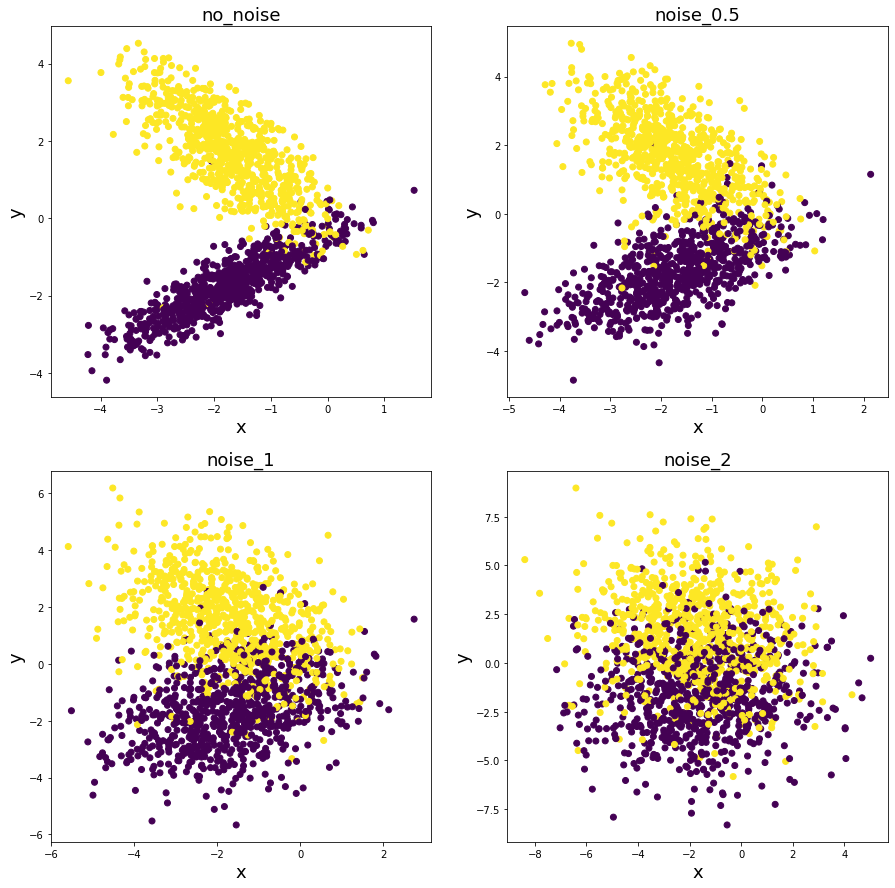

In [15]:
#create four datasets
no_noise = (x,y)
noise_half = (x + 0.5 * noise, y)
noise_1 = (x + 1 * noise, y)
noise_2 = (x + 2 * noise, y)

#combine the four datasets together into one
datasets = [no_noise, noise_half, noise_1, noise_2]
names = ["no_noise", "noise_0.5", "noise_1", "noise_2"]

plt.figure(figsize=(15,15))
plot_dim = (2,2)

for i in range(len(datasets)):
    #generate plot for each dataset
    plt.subplot(plot_dim[0], plot_dim[1], i+1)
    plt.scatter(datasets[i][0][0:,0], datasets[i][0][0:,1], c=datasets[i][1])
    plt.xlabel("x",fontsize=18)
    plt.ylabel("y",fontsize=18)
    plt.title(names[i],fontsize=18)


## Q5. b) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).

In [16]:
x_train, x_test, y_train, y_test = train_test_split(no_noise[0],no_noise[1], test_size=0.30)
x_train_half, x_test_half, y_train_half, y_test_half = train_test_split(noise_half[0],noise_half[1], test_size=0.30)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(noise_1[0],noise_1[1], test_size=0.30)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(noise_2[0],noise_2[1], test_size=0.30)

## Q5. c) For each dataset, train and test an SVM classifier with a polynomial kernel with degree=2, and C=1.0. Report the test score for each. How does prediction accuracy change with noise level?

In [17]:
svcmodel = SVC(kernel= 'poly', degree = 2, C=1.0)

# for no noise  
svcmodel.fit(x_train,y_train)
score_no_noise = svcmodel.score(x_test,y_test)

# for 0.5 noise 
svcmodel.fit(x_train_half,y_train_half)
score_noise_half = svcmodel.score(x_test_half,y_test_half)

# for 1 noise  
svcmodel.fit(x_train_1,y_train_1)
score_noise_1 = svcmodel.score(x_test_1,y_test_1)

# for 2 noise  
svcmodel.fit(x_train_2,y_train_2)
score_noise_2 = svcmodel.score(x_test_2,y_test_2)

print(f'With no noise, accuracy was {score_no_noise}')
print(f'With a noise level of 0.5, accuracy was {score_noise_half}')
print(f'With a noise level of 1, accuracy was {score_noise_1}')
print(f'With a noise level of 2, accuracy was {score_noise_2}')

With no noise, accuracy was 0.9555555555555556
With a noise level of 0.5, accuracy was 0.9266666666666666
With a noise level of 1, accuracy was 0.8288888888888889
With a noise level of 2, accuracy was 0.6755555555555556


## Comment:

    The prediction accuracy decreases along with the increase of the noise level. With no noise, the accuracy is the highest. And with noise level of 2, accuracy is the lowest.

## Q5. d) For a noise level of 0.5, train and test SVM classifiers using the following values for  𝐶:{0.001,0.01,0.1,1,10,100} .

In [18]:
c=(0.001,0.01,0.1,1,10,100)

for i in range(len(c)):
    svcmodel_5d=SVC(kernel= 'poly', degree = 2, C=c[i])
    svcmodel_5d.fit(x_train_half,y_train_half)
    score_noise_half_5d = svcmodel_5d.score(x_test_half,y_test_half)
    print('The accuracy of the classifier with a noise level of 0.5 and C level of  '+str(c[i])+' is '+str(score_noise_half_5d))

The accuracy of the classifier with a noise level of 0.5 and C level of  0.001 is 0.9333333333333333
The accuracy of the classifier with a noise level of 0.5 and C level of  0.01 is 0.9311111111111111
The accuracy of the classifier with a noise level of 0.5 and C level of  0.1 is 0.9133333333333333
The accuracy of the classifier with a noise level of 0.5 and C level of  1 is 0.9266666666666666
The accuracy of the classifier with a noise level of 0.5 and C level of  10 is 0.9288888888888889
The accuracy of the classifier with a noise level of 0.5 and C level of  100 is 0.9266666666666666


## Comment:

## How does performance vary with  𝐶 ?

    There is only very slight difference in performance vary with C.

## Briefly describe what the  𝐶  controls for sklearn.svc. Hint: look at the documentation for sklearn.svc rather than the class notes here...

    C is the regulatization parameter, which controls the strength of the regularization and the trade-off between achieving a low error on the training data and minimizing the norm of the weights. To be simple, lower C means we allow more outliers, and higher C means we allow fewer outliers.

